In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
prices1500_df = pd.read_excel('sp1500.xls', index_col=0, parse_dates=True)
returns1500_df = prices1500_df.apply(np.log).diff().dropna()
returns1500_df.columns = ['Returns']
returns1500_df.head()

,Returns
Date,
2021-05-11,-0.008633
2021-05-12,-0.022564
2021-05-13,0.012755
2021-05-14,0.015121
2021-05-17,-0.002339


In [49]:
prices100_df = pd.read_excel('sp100.xls', index_col=0, parse_dates=True)
returns100_df = prices100_df.apply(np.log).diff().dropna()
returns100_df.columns = ['Returns']
returns100_df.head()

,Returns
Date,
2021-05-11,-0.007814
2021-05-12,-0.020873
2021-05-13,0.011372
2021-05-14,0.014837
2021-05-17,-0.003052


In [50]:
prices400_df = pd.read_excel('midcap400.xls', index_col=0, parse_dates=True)
returns400_df = prices400_df.apply(np.log).diff().dropna()
returns400_df.columns = ['Returns']
returns400_df.head()

,Returns
Date,
2021-05-11,-0.008892
2021-05-12,-0.031471
2021-05-13,0.017907
2021-05-14,0.016854
2021-05-17,-0.001246


In [52]:
prices600_df = pd.read_excel('smallcap600.xls', index_col=0, parse_dates=True)
returns600_df = prices600_df.apply(np.log).diff().dropna()
returns600_df.columns = ['Returns']
returns600_df.head()

,Returns
Date,
2021-05-11,-0.005280
2021-05-12,-0.032665
2021-05-13,0.023818
2021-05-14,0.021803
2021-05-17,0.001482


In [119]:
pricesbtc_df = pd.read_excel('btc.xls', index_col=0, parse_dates=True)
returnsbtc_df = pricesbtc_df.apply(np.log).diff().dropna()
returnsbtc_df.columns = ['Returns']
returnsbtc_df.head()

,Returns
Date,
2021-05-11,0.015010
2021-05-12,-0.142967
2021-05-13,0.011443
2021-05-14,0.003300
2021-05-15,-0.064599


In [122]:
priceseth_df = pd.read_excel('eth.xls', index_col=0, parse_dates=True)
returnseth_df = priceseth_df.apply(np.log).diff().dropna()
returnseth_df.columns = ['Returns']
returnseth_df.head()

,Returns
Date,
2021-05-11,0.053308
2021-05-12,-0.096334
2021-05-13,-0.018851
2021-05-14,0.093447
2021-05-15,-0.114398


In [55]:
pricesbdi_df = pd.read_excel('bdi.xls', index_col=0, parse_dates=True)
returnsbdi_df = pricesbdi_df.apply(np.log).diff().dropna()
returnsbdi_df.columns = ['Returns']
returnsbdi_df.head()

,Returns
Date,
2021-05-11,0.028190
2021-05-12,-0.027702
2021-05-13,-0.111033
2021-05-14,0.064140
2021-05-17,-0.128017


In [57]:
priceslcap_df = pd.read_excel('lcapcrypto.xls', index_col=0, parse_dates=True)
returnslcap_df = priceslcap_df.apply(np.log).diff().dropna()
returnslcap_df.columns = ['Returns']
returnslcap_df.head()

,Returns
Date,
2021-05-11,0.026017
2021-05-12,-0.027840
2021-05-13,-0.110317
2021-05-14,0.061470
2021-05-17,-0.129962


In [59]:
pricesbdmex_df = pd.read_excel('bdmex.xls', index_col=0, parse_dates=True)
returnsbdmex_df = pricesbdmex_df.apply(np.log).diff().dropna()
returnsbdmex_df.columns = ['Returns']
returnsbdmex_df.head()

,Returns
Date,
2021-05-11,0.055974
2021-05-12,-0.028866
2021-05-13,-0.098749
2021-05-14,0.086671
2021-05-17,-0.088495


In [189]:
fama_df = pd.read_excel('fama.xls', index_col=0, parse_dates=True)

fama_df.head()

,MKT,SMB,HML,Rf
Date,,,,
2021-05-11,-0.63,0.96,-0.89,0.0
2021-05-12,-2.34,-1.33,0.71,0.0
2021-05-13,1.02,0.26,1.14,0.0
2021-05-14,1.81,0.98,-0.15,0.0
2021-05-17,-0.24,0.60,0.83,0.0


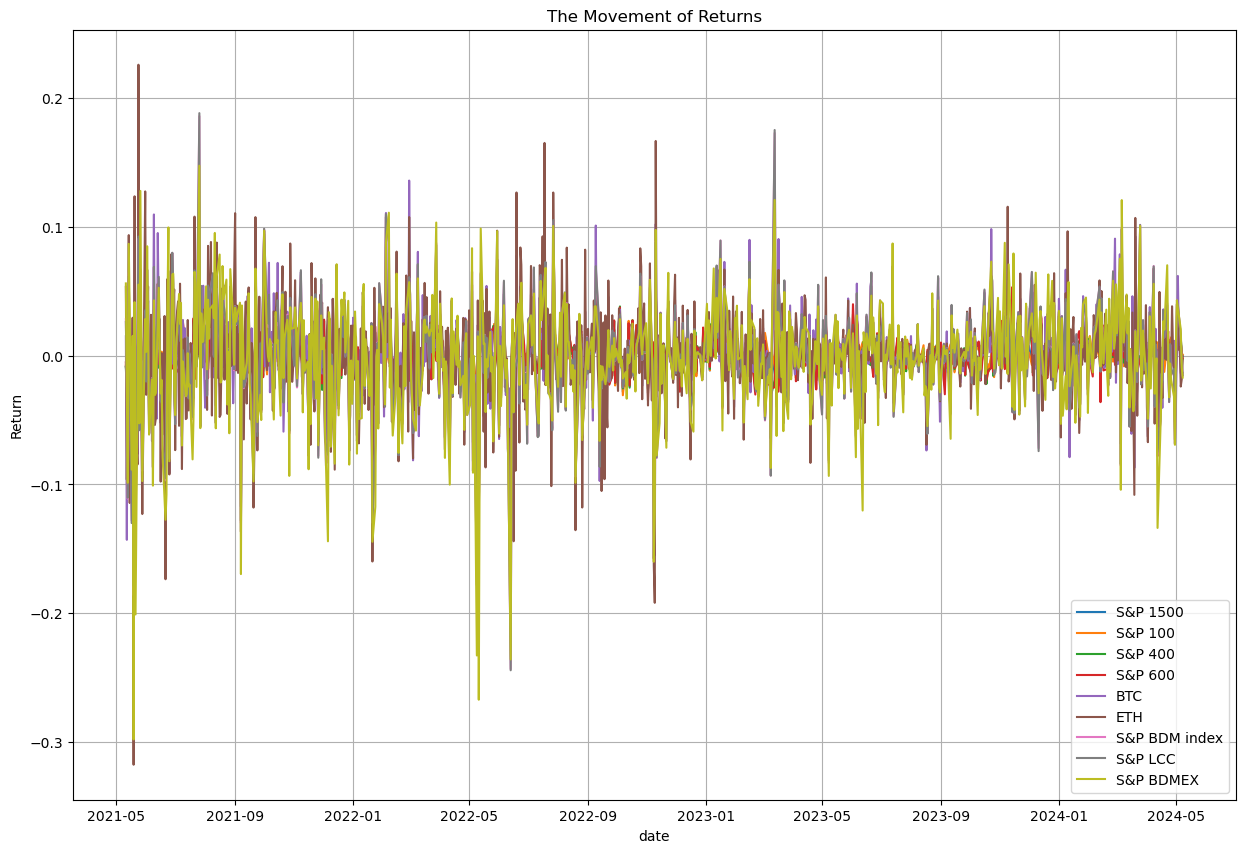

In [217]:
data_names = ["S&P 1500", "S&P 100", "S&P 400", "S&P 600", "BTC", "ETH", "S&P BDM index", "S&P LCC", "S&P BDMEX"]

data_frames = [returns1500_df, returns100_df, returns400_df, returns600_df, returnsbtc_df, returnseth_df,
               returnsbdi_df, returnslcap_df, returnsbdmex_df]

plt.figure(figsize=(15, 10))

for name, df in zip(data_names, data_frames):
    plt.plot(df.index, df['Returns'], label=name)

plt.title("The Movement of Returns")
plt.xlabel("date")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.show()

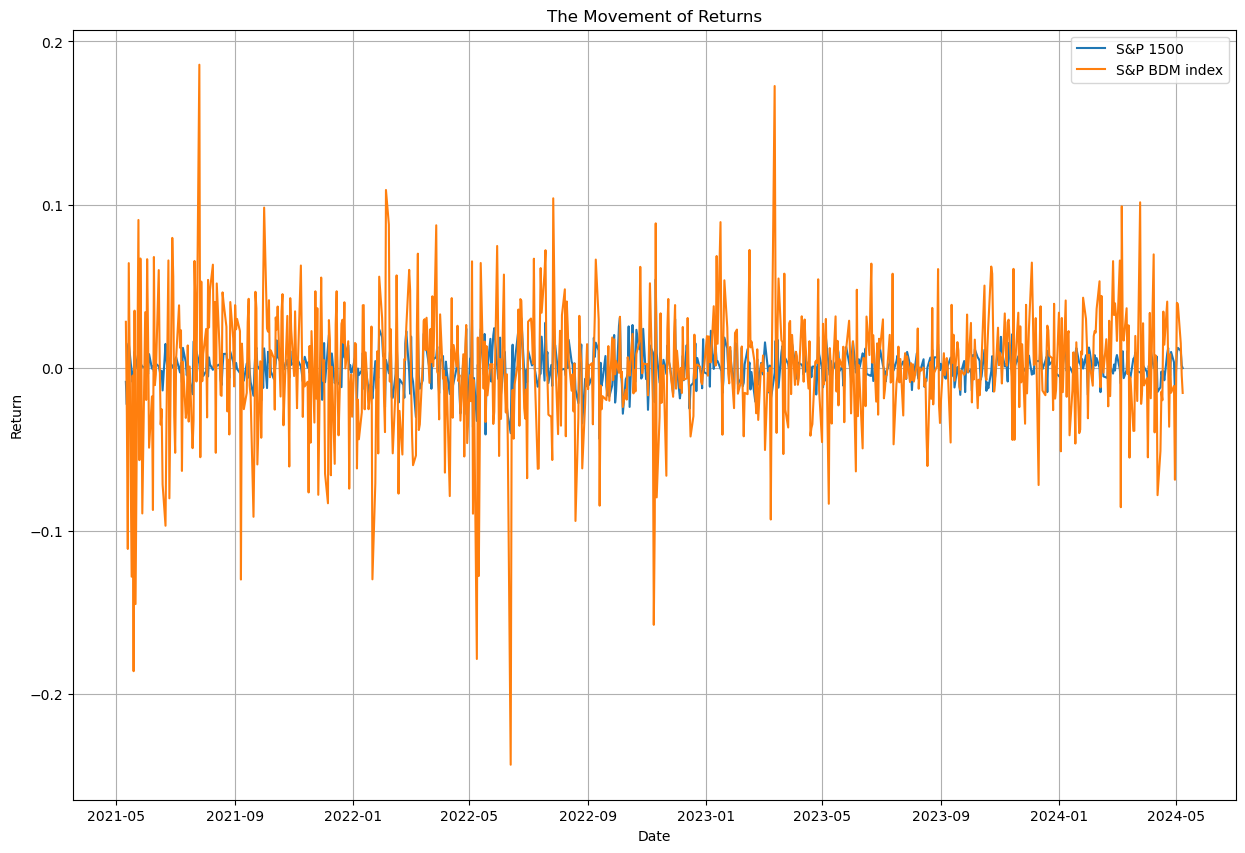

In [218]:
data_names_2 = ["S&P 1500", "S&P BDM index"]
data_frames_2 = [returns1500_df, returnsbdi_df]

plt.figure(figsize=(15, 10))

for name, df in zip(data_names_2, data_frames_2):
    plt.plot(df.index, df['Returns'], label=name)

plt.title("The Movement of Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.show()


In [115]:
stockbig_small_df = pd.merge(returns400_df, returns600_df, left_index=True, right_index=True, suffixes=('_400', '_600'))
stock_inter_df = pd.merge(stockbig_small_df, returns100_df, left_index=True, right_index=True, suffixes=('_bigsmall', '_100'))
stock_df = pd.merge(stockbig_inter_df, returns1500_df, left_index=True, right_index=True, suffixes=('_100', '_1500'))
stock_df.head()





,Returns_400,Returns_600,Returns_100,Returns_1500
Date,,,,
2021-05-11,-0.008892,-0.005280,-0.007814,-0.008633
2021-05-12,-0.031471,-0.032665,-0.020873,-0.022564
2021-05-13,0.017907,0.023818,0.011372,0.012755
2021-05-14,0.016854,0.021803,0.014837,0.015121
2021-05-17,-0.001246,0.001482,-0.003052,-0.002339


In [175]:
ethbtc_df = pd.merge(returnseth_df, returnsbtc_df, left_index=True, right_index=True, suffixes=('_ETH', '_BTC'))
crypto_inter_df = pd.merge(ethbtc_df, returnsbdi_df, left_index=True, right_index=True, suffixes=('_ethbtc', '_Market_Crypto'))
crypto_2_df = pd.merge(crypto_inter_df, returnslcap_df, left_index=True, right_index=True, suffixes=('_Market_Crypto', '_Large_Cap'))
crypto_df = pd.merge(crypto_2_df, returnsbdmex_df, left_index=True, right_index=True, suffixes=('_Large_Cap', '_Mega_cap_excluded'))
crypto_df.head()

,Returns_ETH,Returns_BTC,Returns_Market_Crypto,Returns_Large_Cap,Returns
Date,,,,,
2021-05-11,0.053308,0.015010,0.028190,0.026017,0.055974
2021-05-12,-0.096334,-0.142967,-0.027702,-0.027840,-0.028866
2021-05-13,-0.018851,0.011443,-0.111033,-0.110317,-0.098749
2021-05-14,0.093447,0.003300,0.064140,0.061470,0.086671
2021-05-17,-0.088883,-0.064884,-0.128017,-0.129962,-0.088495


<Axes: >

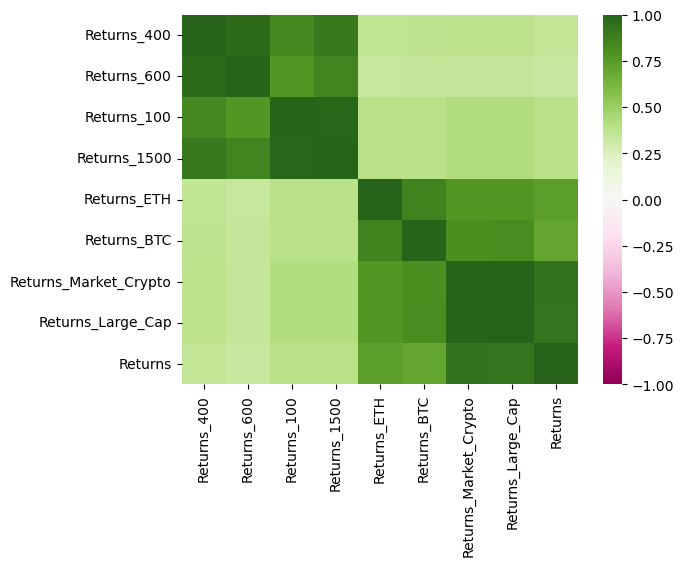

In [176]:
total_df = pd.merge(stock_df, crypto_df, left_index=True, right_index=True)
sns.heatmap(total_df.corr(), vmin=-1, vmax=1, cmap="PiYG")

<Axes: >

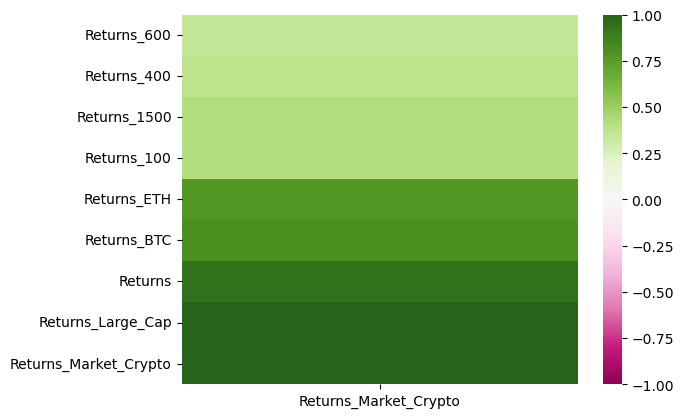

In [219]:
sns.heatmap(total_df.corr()[['Returns_Market_Crypto']].sort_values(by='Returns_Market_Crypto'), vmin=-1, vmax=1, cmap="PiYG")


In [179]:
total_df.cov()

,Returns_400,Returns_600,Returns_100,Returns_1500,Returns_ETH,Returns_BTC,Returns_Market_Crypto,Returns_Large_Cap,Returns
Returns_400,0.000161,0.000168,0.000121,0.000127,0.000210,0.000168,0.000189,0.000190,0.000204
Returns_600,0.000168,0.000188,0.000121,0.000128,0.000210,0.000169,0.000189,0.000189,0.000205
Returns_100,0.000121,0.000121,0.000129,0.000123,0.000201,0.000158,0.000189,0.000190,0.000203
Returns_1500,0.000127,0.000128,0.000123,0.000121,0.000196,0.000154,0.000182,0.000182,0.000196
Returns_ETH,0.000210,0.000210,0.000201,0.000196,0.002030,0.001382,0.001395,0.001393,0.001507
Returns_BTC,0.000168,0.000169,0.000158,0.000154,0.001382,0.001267,0.001146,0.001151,0.001138
Returns_Market_Crypto,0.000189,0.000189,0.000189,0.000182,0.001395,0.001146,0.001577,0.001576,0.001677
Returns_Large_Cap,0.000190,0.000189,0.000190,0.000182,0.001393,0.001151,0.001576,0.001576,0.001662
Returns,0.000204,0.000205,0.000203,0.000196,0.001507,0.001138,0.001677,0.001662,0.002052


<Axes: >

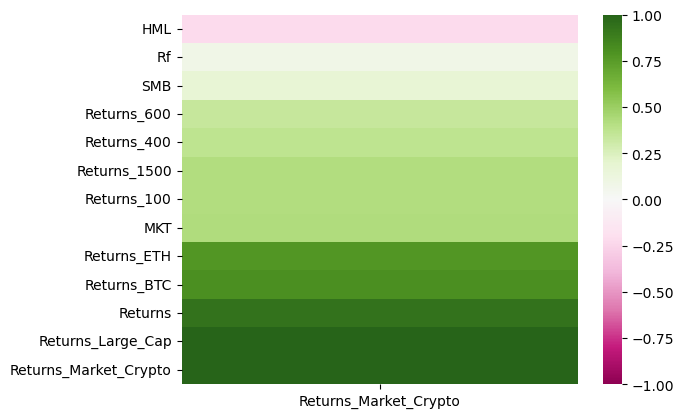

In [192]:
total_fama_df = pd.merge(total_df, fama_df, left_index=True, right_index=True)
sns.heatmap(total_fama_df.corr()[['Returns_Market_Crypto']].sort_values(by='Returns_Market_Crypto'), vmin=-1, vmax=1, cmap="PiYG")

In [169]:
sm.ols(formula="Returns_1500~Returns_BTC", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Returns_1500   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     133.3
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.97e-28
Time:                        22:50:26   Log-Likelihood:                 2300.8
No. Observations:                 726   AIC:                            -4598.
Df Residuals:                     724   BIC:                            -4588.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0003      0.000      0.909      0.364      -0.000       0.001
Returns_BTC     0.1221      0.011     11.548      0.000       0.101       0.143
==============================================================================
Omnibus:                        7.881   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.019   Jarque-Bera (JB):               11.458
Skew:                          -0.021   Prob(JB):                      0.00325
Kurtosis:                       3.614   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
sm.ols(formula="Returns_1500~Returns_ETH", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Returns_1500   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     134.0
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.50e-28
Time:                        22:50:33   Log-Likelihood:                 2301.1
No. Observations:                 726   AIC:                            -4598.
Df Residuals:                     724   BIC:                            -4589.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0004      0.000      1.001      0.317      -0.000       0.001
Returns_ETH     0.0963      0.008     11.575      0.000       0.080       0.113
==============================================================================
Omnibus:                        9.785   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               15.373
Skew:                          -0.020   Prob(JB):                     0.000459
Kurtosis:                       3.712   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
sm.ols(formula="Returns_1500~Returns_Market_Crypto", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Returns_1500   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     151.9
Date:                Wed, 08 May 2024   Prob (F-statistic):           8.23e-32
Time:                        23:44:42   Log-Likelihood:                 2308.5
No. Observations:                 726   AIC:                            -4613.
Df Residuals:                     724   BIC:                            -4604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0004      0.000      0.969      0.333      -0.000       0.001
Returns_Market_Crypto     0.1156      0.009     12.323      0.000       0.097       0.134
==============================================================================
Omnibus:                       12.096   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.714
Skew:                          -0.006   Prob(JB):                     3.18e-05
Kurtosis:                       3.827   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
sm.ols(formula="Returns_1500~Returns_Large_Cap", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Returns_1500   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     152.5
Date:                Wed, 08 May 2024   Prob (F-statistic):           6.32e-32
Time:                        22:53:25   Log-Likelihood:                 2308.8
No. Observations:                 726   AIC:                            -4614.
Df Residuals:                     724   BIC:                            -4604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0004      0.000      0.947      0.344      -0.000       0.001
Returns_Large_Cap     0.1158      0.009     12.349      0.000       0.097       0.134
==============================================================================
Omnibus:                       11.984   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.433
Skew:                          -0.009   Prob(JB):                     3.66e-05
Kurtosis:                       3.822   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
sm.ols(formula="Returns_1500~Returns", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Returns_1500   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     131.3
Date:                Wed, 08 May 2024   Prob (F-statistic):           4.68e-28
Time:                        22:53:32   Log-Likelihood:                 2299.9
No. Observations:                 726   AIC:                            -4596.
Df Residuals:                     724   BIC:                            -4587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.000      1.194      0.233      -0.000       0.001
Returns        0.0955      0.008     11.460      0.000       0.079       0.112
==============================================================================
Omnibus:                       15.199   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.674
Skew:                           0.020   Prob(JB):                     5.94e-07
Kurtosis:                       3.973   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
sm.ols(formula="Returns_100~Returns_BTC", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Returns_100   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     131.7
Date:                Wed, 08 May 2024   Prob (F-statistic):           4.01e-28
Time:                        22:58:32   Log-Likelihood:                 2276.9
No. Observations:                 726   AIC:                            -4550.
Df Residuals:                     724   BIC:                            -4541.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0004      0.000      1.075      0.283      -0.000       0.001
Returns_BTC     0.1254      0.011     11.475      0.000       0.104       0.147
==============================================================================
Omnibus:                        8.965   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               13.301
Skew:                          -0.055   Prob(JB):                      0.00129
Kurtosis:                       3.654   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
sm.ols(formula="Returns_100~Returns_ETH", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Returns_100   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     132.8
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.53e-28
Time:                        22:58:41   Log-Likelihood:                 2277.3
No. Observations:                 726   AIC:                            -4551.
Df Residuals:                     724   BIC:                            -4541.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0005      0.000      1.167      0.244      -0.000       0.001
Returns_ETH     0.0990      0.009     11.522      0.000       0.082       0.116
==============================================================================
Omnibus:                       10.704   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               16.933
Skew:                          -0.058   Prob(JB):                     0.000210
Kurtosis:                       3.739   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
sm.ols(formula="Returns_100~Returns_Market_Crypto", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Returns_100   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     155.1
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.17e-32
Time:                        22:58:56   Log-Likelihood:                 2286.7
No. Observations:                 726   AIC:                            -4569.
Df Residuals:                     724   BIC:                            -4560.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0004      0.000      1.142      0.254      -0.000       0.001
Returns_Market_Crypto     0.1204      0.010     12.452      0.000       0.101       0.139
==============================================================================
Omnibus:                       11.518   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               19.031
Skew:                          -0.043   Prob(JB):                     7.37e-05
Kurtosis:                       3.789   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
sm.ols(formula="Returns_100~Returns_Large_Cap", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Returns_100   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     155.7
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.66e-32
Time:                        22:59:07   Log-Likelihood:                 2286.9
No. Observations:                 726   AIC:                            -4570.
Df Residuals:                     724   BIC:                            -4561.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0004      0.000      1.120      0.263      -0.000       0.001
Returns_Large_Cap     0.1206      0.010     12.478      0.000       0.102       0.140
==============================================================================
Omnibus:                       11.418   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               18.756
Skew:                          -0.046   Prob(JB):                     8.46e-05
Kurtosis:                       3.782   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
sm.ols(formula="Returns_100~Returns", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Returns_100   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     132.9
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.35e-28
Time:                        22:59:15   Log-Likelihood:                 2277.4
No. Observations:                 726   AIC:                            -4551.
Df Residuals:                     724   BIC:                            -4542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.000      1.364      0.173      -0.000       0.001
Returns        0.0991      0.009     11.530      0.000       0.082       0.116
==============================================================================
Omnibus:                       15.202   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.686
Skew:                          -0.020   Prob(JB):                     5.90e-07
Kurtosis:                       3.973   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
sm.ols(formula="Returns_400~Returns_BTC", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Returns_400   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     114.8
Date:                Wed, 08 May 2024   Prob (F-statistic):           5.84e-25
Time:                        22:59:23   Log-Likelihood:                 2186.9
No. Observations:                 726   AIC:                            -4370.
Df Residuals:                     724   BIC:                            -4361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0002      0.000      0.453      0.651      -0.001       0.001
Returns_BTC     0.1325      0.012     10.713      0.000       0.108       0.157
==============================================================================
Omnibus:                        3.104   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                3.344
Skew:                           0.051   Prob(JB):                        0.188
Kurtosis:                       3.316   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
sm.ols(formula="Returns_400~Returns_ETH", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Returns_400   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     111.0
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.98e-24
Time:                        22:59:38   Log-Likelihood:                 2185.3
No. Observations:                 726   AIC:                            -4367.
Df Residuals:                     724   BIC:                            -4357.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0002      0.000      0.534      0.594      -0.001       0.001
Returns_ETH     0.1028      0.010     10.537      0.000       0.084       0.122
==============================================================================
Omnibus:                        3.525   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                3.789
Skew:                           0.073   Prob(JB):                        0.150
Kurtosis:                       3.322   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
sm.ols(formula="Returns_400~Returns_Market_Crypto", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Returns_400   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     115.6
Date:                Wed, 08 May 2024   Prob (F-statistic):           4.11e-25
Time:                        22:59:55   Log-Likelihood:                 2187.3
No. Observations:                 726   AIC:                            -4371.
Df Residuals:                     724   BIC:                            -4361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0002      0.000      0.491      0.624      -0.001       0.001
Returns_Market_Crypto     0.1192      0.011     10.751      0.000       0.097       0.141
==============================================================================
Omnibus:                        8.356   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               11.971
Skew:                           0.063   Prob(JB):                      0.00252
Kurtosis:                       3.616   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
sm.ols(formula="Returns_400~Returns_Large_Cap", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Returns_400   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     116.3
Date:                Wed, 08 May 2024   Prob (F-statistic):           3.01e-25
Time:                        23:00:05   Log-Likelihood:                 2187.6
No. Observations:                 726   AIC:                            -4371.
Df Residuals:                     724   BIC:                            -4362.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0002      0.000      0.472      0.637      -0.001       0.001
Returns_Large_Cap     0.1195      0.011     10.784      0.000       0.098       0.141
==============================================================================
Omnibus:                        8.279   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               11.871
Skew:                           0.059   Prob(JB):                      0.00264
Kurtosis:                       3.615   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
sm.ols(formula="Returns_400~Returns", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Returns_400   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     100.3
Date:                Wed, 08 May 2024   Prob (F-statistic):           3.44e-22
Time:                        23:00:18   Log-Likelihood:                 2180.6
No. Observations:                 726   AIC:                            -4357.
Df Residuals:                     724   BIC:                            -4348.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.000      0.693      0.489      -0.001       0.001
Returns        0.0983      0.010     10.013      0.000       0.079       0.118
==============================================================================
Omnibus:                        8.721   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               11.939
Skew:                           0.101   Prob(JB):                      0.00256
Kurtosis:                       3.595   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
sm.ols(formula="Returns_600~Returns_BTC", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Returns_600   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     98.28
Date:                Wed, 08 May 2024   Prob (F-statistic):           8.25e-22
Time:                        23:00:35   Log-Likelihood:                 2125.4
No. Observations:                 726   AIC:                            -4247.
Df Residuals:                     724   BIC:                            -4238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.338e-05      0.000      0.111      0.912      -0.001       0.001
Returns_BTC     0.1334      0.013      9.914      0.000       0.107       0.160
==============================================================================
Omnibus:                        6.870   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                7.576
Skew:                           0.156   Prob(JB):                       0.0226
Kurtosis:                       3.392   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
sm.ols(formula="Returns_600~Returns_ETH", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Returns_600   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     93.26
Date:                Wed, 08 May 2024   Prob (F-statistic):           7.75e-21
Time:                        23:00:45   Log-Likelihood:                 2123.2
No. Observations:                 726   AIC:                            -4242.
Df Residuals:                     724   BIC:                            -4233.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.918e-05      0.000      0.185      0.854      -0.001       0.001
Returns_ETH     0.1026      0.011      9.657      0.000       0.082       0.123
==============================================================================
Omnibus:                        8.127   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.639
Skew:                           0.196   Prob(JB):                       0.0133
Kurtosis:                       3.363   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
sm.ols(formula="Returns_600~Returns_Market_Crypto", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Returns_600   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     96.39
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.92e-21
Time:                        23:00:57   Log-Likelihood:                 2124.5
No. Observations:                 726   AIC:                            -4245.
Df Residuals:                     724   BIC:                            -4236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6.954e-05      0.000      0.144      0.885      -0.001       0.001
Returns_Market_Crypto     0.1187      0.012      9.818      0.000       0.095       0.142
==============================================================================
Omnibus:                       13.771   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.318
Skew:                           0.183   Prob(JB):                     6.39e-05
Kurtosis:                       3.711   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
sm.ols(formula="Returns_600~Returns_Large_Cap", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Returns_600   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     97.03
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.44e-21
Time:                        23:01:17   Log-Likelihood:                 2124.8
No. Observations:                 726   AIC:                            -4246.
Df Residuals:                     724   BIC:                            -4236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.091e-05      0.000      0.126      0.899      -0.001       0.001
Returns_Large_Cap     0.1190      0.012      9.851      0.000       0.095       0.143
==============================================================================
Omnibus:                       13.630   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.165
Skew:                           0.180   Prob(JB):                     6.89e-05
Kurtosis:                       3.710   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
sm.ols(formula="Returns_600~Returns", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Returns_600   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     84.95
Date:                Wed, 08 May 2024   Prob (F-statistic):           3.27e-19
Time:                        23:01:23   Log-Likelihood:                 2119.4
No. Observations:                 726   AIC:                            -4235.
Df Residuals:                     724   BIC:                            -4226.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.000      0.334      0.738      -0.001       0.001
Returns        0.0985      0.011      9.217      0.000       0.077       0.119
==============================================================================
Omnibus:                       13.783   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.620
Skew:                           0.217   Prob(JB):                     0.000149
Kurtosis:                       3.627   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [210]:
sm.ols(formula="Returns_BTC~MKT+SMB+HML", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Returns_BTC   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     51.64
Date:                Wed, 08 May 2024   Prob (F-statistic):           3.01e-30
Time:                        23:02:23   Log-Likelihood:                 1458.6
No. Observations:                 726   AIC:                            -2909.
Df Residuals:                     722   BIC:                            -2891.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0005      0.001     -0.453      0.651      -0.003       0.002
MKT            0.0109      0.001      9.258      0.000       0.009       0.013
SMB            0.0034      0.002      1.869      0.062      -0.000       0.007
HML           -0.0032      0.001     -2.413      0.016      -0.006      -0.001
==============================================================================
Omnibus:                       50.774   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.199
Skew:                          -0.171   Prob(JB):                     6.77e-43
Kurtosis:                       5.511   Cond. No.                         2.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
sm.ols(formula="Returns_ETH~MKT+SMB+HML", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Returns_ETH   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     51.98
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.00e-30
Time:                        23:02:39   Log-Likelihood:                 1285.2
No. Observations:                 726   AIC:                            -2562.
Df Residuals:                     722   BIC:                            -2544.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0011      0.002     -0.706      0.480      -0.004       0.002
MKT            0.0140      0.001      9.372      0.000       0.011       0.017
SMB            0.0031      0.002      1.337      0.182      -0.001       0.008
HML           -0.0045      0.002     -2.721      0.007      -0.008      -0.001
==============================================================================
Omnibus:                      160.725   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1478.910
Skew:                          -0.709   Prob(JB):                         0.00
Kurtosis:                       9.847   Cond. No.                         2.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
sm.ols(formula="Returns_Market_Crypto~MKT+SMB+HML", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Returns_Market_Crypto   R-squared:                       0.191
Model:                               OLS   Adj. R-squared:                  0.187
Method:                    Least Squares   F-statistic:                     56.66
Date:                   Wed, 08 May 2024   Prob (F-statistic):           6.75e-33
Time:                           23:02:52   Log-Likelihood:                 1386.0
No. Observations:                    726   AIC:                            -2764.
Df Residuals:                        722   BIC:                            -2746.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0008      0.001     -0.635      0.526      -0.003       0.002
MKT            0.0135      0.001     10.372      0.000       0.011       0.016
SMB            0.0017      0.002      0.816      0.415      -0.002       0.006
HML           -0.0032      0.001     -2.187      0.029      -0.006      -0.000
==============================================================================
Omnibus:                      107.048   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              623.154
Skew:                          -0.499   Prob(JB):                    4.83e-136
Kurtosis:                       7.428   Cond. No.                         2.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [213]:
sm.ols(formula="Returns_Large_Cap~MKT+SMB+HML", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Returns_Large_Cap   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     57.01
Date:                Wed, 08 May 2024   Prob (F-statistic):           4.42e-33
Time:                        23:03:07   Log-Likelihood:                 1386.3
No. Observations:                 726   AIC:                            -2765.
Df Residuals:                     722   BIC:                            -2746.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0008      0.001     -0.578      0.564      -0.003       0.002
MKT            0.0135      0.001     10.378      0.000       0.011       0.016
SMB            0.0017      0.002      0.849      0.396      -0.002       0.006
HML           -0.0032      0.001     -2.220      0.027      -0.006      -0.000
==============================================================================
Omnibus:                      100.439   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              597.161
Skew:                          -0.442   Prob(JB):                    2.13e-130
Kurtosis:                       7.354   Cond. No.                         2.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
sm.ols(formula="Returns~MKT+SMB+HML", data=total_fama_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     47.19
Date:                Wed, 08 May 2024   Prob (F-statistic):           7.38e-28
Time:                        23:03:17   Log-Likelihood:                 1279.4
No. Observations:                 726   AIC:                            -2551.
Df Residuals:                     722   BIC:                            -2533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0020      0.002     -1.276      0.202      -0.005       0.001
MKT            0.0149      0.002      9.887      0.000       0.012       0.018
SMB            0.0013      0.002      0.556      0.579      -0.003       0.006
HML           -0.0021      0.002     -1.260      0.208      -0.005       0.001
==============================================================================
Omnibus:                      239.317   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1571.249
Skew:                          -1.317   Prob(JB):                         0.00
Kurtosis:                       9.709   Cond. No.                         2.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""